In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *
import json

In [5]:
with open('../sim_outputs/req_abilene_db.json', 'r') as file:
    data = json.load(file)

In [6]:
import json

def query_json_db(db_file, parameter_filters):
    """
    Queries a JSON database for entries matching specific parameters.

    Args:
        db_file (str): Path to the JSON database file.
        parameter_filters (dict): Dictionary containing parameter filters, 
                                 where keys are parameter names and values are
                                 the desired values.

    Returns:
        tuple: A tuple containing:
            - dict: A dictionary of matching entries (keys are entry IDs, values are data).
            - list: A list of matching entry IDs.
    """

    with open(db_file, 'r') as file:
        db_data = json.load(file)

    matching_entries_dict = {}
    matching_entries_params = []

    for entry_id, entry_data in db_data.items():
        if "parameters" in entry_data:
            parameters = entry_data["parameters"]

            if all(parameters.get(param) == value 
                   for param, value in parameter_filters.items()):
                matching_entries_dict[entry_id] = entry_data
                matching_entries_params.append(parameters)  # Store the matching ID

    return matching_entries_dict, matching_entries_params

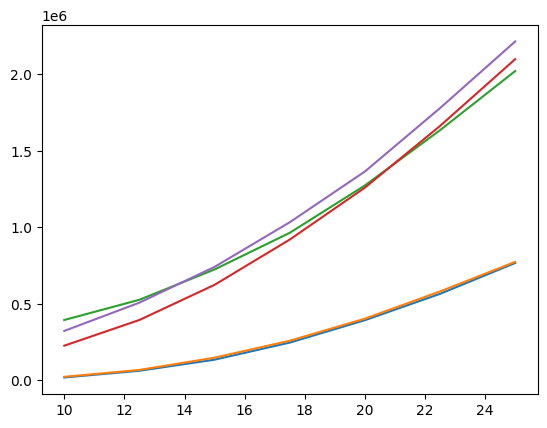

In [7]:
db_file = '../sim_outputs/req_abilene_db.json'
fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25]

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": 0.75,
    "cache_capacities": [5,100]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, label="mvip")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": 0.75,
    "cache_capacities": [5,50]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, label="lfu")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": 0.75,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, label="lru")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": 0.75,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, label="unif")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": 0.75,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, label="fifo")